<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#类别分布" data-toc-modified-id="类别分布-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>类别分布</a></span></li><li><span><a href="#新闻长度分布" data-toc-modified-id="新闻长度分布-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>新闻长度分布</a></span></li><li><span><a href="#词汇分布" data-toc-modified-id="词汇分布-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>词汇分布</a></span></li></ul></div>

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("data/train_set.csv", sep="\t", nrows=20000)
df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
label    20000 non-null int64
text     20000 non-null object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


# 类别分布

In [14]:
label2id = {'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

In [15]:
id2label = dict([(_id, label)for (label, _id) in label2id.items()])
id2label

{0: '科技',
 1: '股票',
 2: '体育',
 3: '娱乐',
 4: '时政',
 5: '社会',
 6: '教育',
 7: '财经',
 8: '家居',
 9: '游戏',
 10: '房产',
 11: '时尚',
 12: '彩票',
 13: '星座'}

In [16]:
df["label"].value_counts().plot(kind="bar", title="label distribution")

从类别分布可以看到这是一个类别分布不均衡的数据集，其中科技、股票占据了大部分比例，占比最少的是星座。

# 新闻长度分布

In [17]:
df["text_chars"] = df["text"].apply(lambda x: x.split())
df.head()

,label,text,text_chars
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,"[2967, 6758, 339, 2021, 1854, 3731, 4109, 3792..."
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,"[4464, 486, 6352, 5619, 2465, 4802, 1452, 3137..."
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,"[7346, 4068, 5074, 3747, 5681, 6093, 1777, 222..."
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,"[7159, 948, 4866, 2109, 5520, 2490, 211, 3956,..."
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,"[3646, 3055, 3055, 2490, 4659, 6065, 3370, 581..."


In [18]:
df["text_chars"].apply(len).describe()

count    20000.00000
mean       904.61785
std        961.69081
min          2.00000
25%        375.00000
50%        676.00000
75%       1125.00000
max      44665.00000
Name: text_chars, dtype: float64

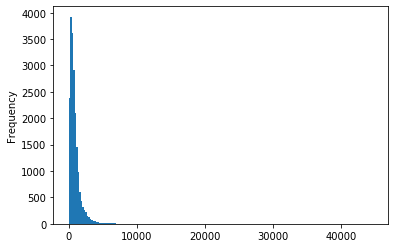

In [19]:
df["text_chars"].apply(len).plot(kind="hist", bins=200)

可以看到文本长度的分布比较分散，最少的只有2个字，最多的有4w+个字。大部分新闻的长度在1k左右。

# 词汇分布

In [20]:
vocab = {}
for doc in df["text_chars"]:
    for w in doc:
        if w in vocab:
            vocab[w] += 1
        else:
            vocab[w] = 1
            
vocab = sorted(vocab.items(), key=lambda x: x[1], reverse=True)

In [21]:
vocab[:20]

[('3750', 742697),
 ('648', 489642),
 ('900', 324097),
 ('3370', 202245),
 ('6122', 158614),
 ('4464', 154757),
 ('7399', 144340),
 ('4939', 136550),
 ('3659', 124451),
 ('4811', 114359),
 ('2465', 114257),
 ('5598', 110859),
 ('669', 107282),
 ('2400', 103015),
 ('5560', 102864),
 ('299', 92441),
 ('2109', 91707),
 ('4893', 90427),
 ('4411', 88354),
 ('1699', 85354)]

In [22]:
vocab[-10:]

[('4195', 1),
 ('5756', 1),
 ('4710', 1),
 ('3927', 1),
 ('3122', 1),
 ('2962', 1),
 ('4953', 1),
 ('200', 1),
 ('3269', 1),
 ('2263', 1)]

可以根据字符在文档中的分布情况，推断出字符代表的字。比如，在每个文档中都会出现的字符，可能是标点。

In [23]:
char_in_doc_count = {}
for doc in df["text_chars"].apply(lambda x: list(set(x))):
    for w in doc:
        if w in char_in_doc_count:
            char_in_doc_count[w] += 1
        else:
            char_in_doc_count[w] = 1
            
char_in_doc_count = sorted(char_in_doc_count.items(), key=lambda x: x[1], reverse=True)

In [24]:
char_in_doc_count[:20]

[('3750', 19828),
 ('900', 19790),
 ('648', 19229),
 ('2465', 17668),
 ('6122', 17640),
 ('7399', 17557),
 ('4811', 16910),
 ('4464', 16766),
 ('1699', 16530),
 ('2400', 16320),
 ('3659', 16308),
 ('299', 16300),
 ('3370', 16233),
 ('2109', 15838),
 ('4939', 15766),
 ('5598', 15652),
 ('669', 15579),
 ('5445', 15433),
 ('4853', 15286),
 ('5948', 14968)]

结合字符的个数分布情况来看，3750、900、648这些字符可能是标点符号。

In [29]:
! echo "1234 3750 4567" | sed "s/3750//g; s/900//g; s/648//g"

1234  4567
